# CS381/780 Data Analytics Final Project

### Due on 5/19/2021 23:59 pm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [4]:
# for z score
from scipy import stats
# for data normalization
from sklearn.preprocessing import MaxAbsScaler
import random

### Dataset is based on an original student performance dataset provided on Kaggle

https://www.kaggle.com/impapan/student-performance-data-set


### I have modified the original dataset slightly, removed some attributes and include the first term grade from the language course


In [30]:
df = pd.read_csv("student_performance_modified.csv")
df.head()

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,sex,address,famsize,...,paid,activities,higher,internet,famrel,freetime,Dalc,Walc,health,Math_FinalG3
0,18.0,2,2,0,6,5.0,0,F,U,GT3,...,no,no,yes,no,4,3,1,1,3,6
1,17.0,1,2,0,4,5.0,9,F,U,GT3,...,no,no,yes,yes,5,3,1,1,3,6
2,15.0,1,2,3,10,7.0,12,F,U,LE3,...,yes,no,yes,yes,4,3,2,3,3,10
3,15.0,1,3,0,2,15.0,14,F,U,GT3,...,yes,yes,yes,yes,3,2,1,1,5,15
4,16.0,1,2,0,4,6.0,11,F,U,GT3,...,yes,no,yes,no,4,3,1,2,5,10


In [6]:
df.columns

Index(['age', 'traveltime', 'studytime', 'failures', 'absences', 'Math_G1',
       'Language_G1', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'schoolsup', 'famsup', 'paid', 'activities', 'higher',
       'internet', 'famrel', 'freetime', 'Dalc', 'Walc', 'health',
       'Math_FinalG3'],
      dtype='object')

### First we replace the Math_FinalG3 by a binary label to indicate underperformance

In [31]:
df['underperformance'] = df['Math_FinalG3'].apply(lambda x: 1 if x < 9 else 0)
df = df.drop(['Math_FinalG3'], axis=1)
df.head()

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,sex,address,famsize,...,paid,activities,higher,internet,famrel,freetime,Dalc,Walc,health,underperformance
0,18.0,2,2,0,6,5.0,0,F,U,GT3,...,no,no,yes,no,4,3,1,1,3,1
1,17.0,1,2,0,4,5.0,9,F,U,GT3,...,no,no,yes,yes,5,3,1,1,3,1
2,15.0,1,2,3,10,7.0,12,F,U,LE3,...,yes,no,yes,yes,4,3,2,3,3,0
3,15.0,1,3,0,2,15.0,14,F,U,GT3,...,yes,yes,yes,yes,3,2,1,1,5,0
4,16.0,1,2,0,4,6.0,11,F,U,GT3,...,yes,no,yes,no,4,3,1,2,5,0


### Your task in the final project is build the best predictive model to predict who would underperform in their final Math Grade so that the school can proactively find ways to help the students

* Use any one of the models (Logistic, SVM, Naive Bayes, Decision Tree and Random Forecast) that we have covered in class.
* Do not use any models that we have not covered in class.

### Math_G1 is the Math Grade in first term and Language_G1 is the first term grade in language. Math_G1 should have a high correlation of the Student Final Math Grade. However, it won't be available at the beginning of the school year

### Therefore, you need to build two sets of models. One set is not to use these G1 varaibles, the others you could. Find out if the language grade will be useful or not in determining the final Math grade

### Make sure your work include the following steps

* EDA (chekcing missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least two models and checked their model performance
* performed cross-validations


<AxesSubplot:xlabel='underperformance', ylabel='count'>

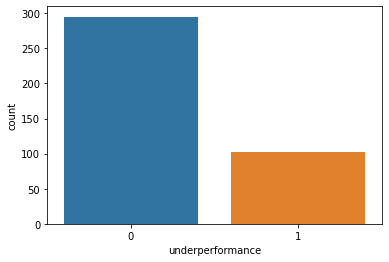

In [8]:
sns.countplot(df['underperformance'])

### Good Luck !!!

Show all your work below

## EDA Phase

### I found this from https://analyticsindiamag.com/tips-for-automating-eda-using-pandas-profiling-sweetviz-and-autoviz-in-python/ via a Kaggle comment.

In [32]:
import sweetviz as sv
sweet_report = sv.analyze(df)
sweet_report.show_html('sweet_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Find/replace nulls

In [9]:
df.isnull().any()

age                  True
traveltime          False
studytime           False
failures            False
absences            False
Math_G1              True
Language_G1         False
sex                 False
address             False
famsize             False
Pstatus             False
Medu                False
Fedu                False
Mjob                False
Fjob                False
schoolsup           False
famsup              False
paid                False
activities          False
higher              False
internet            False
famrel              False
freetime            False
Dalc                False
Walc                False
health              False
underperformance    False
dtype: bool

## Setup dummy variables to take care categorical variables

In [33]:
# remove NA
# I've opted to just delete them. 
# Benefits: easy and quick. Drawbacks: am deleteing data and may mess up the distribution. Oh well.
orig_df = df
orig_df.dropna(inplace=True)

# dummy variables
# all other variables are either numeric or boolean.
orig_df = orig_df.join(pd.get_dummies(df['Mjob'], prefix='Mjob'))
orig_df = orig_df.join(pd.get_dummies(df['Fjob'], prefix='Fjob'))
orig_df = orig_df.join(pd.get_dummies(df['famsize']))
orig_df = orig_df.join(pd.get_dummies(df['sex']))
orig_df = orig_df.join(pd.get_dummies(df['Pstatus']))
orig_df = orig_df.join(pd.get_dummies(df['address']))
orig_df = orig_df.drop(['sex', 'famsize', 'address','Pstatus','Mjob', 'Fjob'],axis=1)

# go from string yes/no to boolean
yes_no_features = ['schoolsup','famsup','paid','activities','higher','internet']
for feat in yes_no_features:
    orig_df[feat] = orig_df[feat].apply(lambda x: 1 if x=='yes' else 0)

df = orig_df

In [34]:
# rename columns that aren't clear
df = df.rename(columns={'F':'female','M':'male','A':'apart','T':'together','R':'rural','U':'urban'})

In [12]:
df.head()

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,Medu,Fedu,schoolsup,...,Fjob_services,Fjob_teacher,GT3,LE3,female,male,apart,together,rural,urban
0,18.0,2,2,0,6,5.0,0,4,4,1,...,0,1,1,0,1,0,1,0,0,1
1,17.0,1,2,0,4,5.0,9,1,1,0,...,0,0,1,0,1,0,0,1,0,1
2,15.0,1,2,3,10,7.0,12,1,1,1,...,0,0,0,1,1,0,0,1,0,1
3,15.0,1,3,0,2,15.0,14,4,2,0,...,1,0,1,0,1,0,0,1,0,1
4,16.0,1,2,0,4,6.0,11,3,3,0,...,0,0,1,0,1,0,0,1,0,1


In [9]:
df.columns

Index(['age', 'traveltime', 'studytime', 'failures', 'absences', 'Math_G1',
       'Language_G1', 'Medu', 'Fedu', 'schoolsup', 'famsup', 'paid',
       'activities', 'higher', 'internet', 'famrel', 'freetime', 'Dalc',
       'Walc', 'health', 'underperformance', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'GT3',
       'LE3', 'female', 'male', 'apart', 'together', 'rural', 'urban'],
      dtype='object')

### Check for outliers
#### If they are more than 4 standard deviations away, I am just going to get rid of them. Garbage in, garbage out. If the data is more than 4 standard deviations away, it is an outlier should not be used in our model.

In [35]:
df.shape

(396, 39)

In [36]:
threshold = 5
z = np.abs(stats.zscore(df))
print(np.where(z > threshold))
df = df[(z < threshold).all(axis=1)]

(array([ 39,  75, 184, 277], dtype=int64), array([0, 4, 4, 4], dtype=int64))


In [37]:
df.shape

(392, 39)

In [17]:
df.head()

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,Medu,Fedu,schoolsup,...,Fjob_services,Fjob_teacher,GT3,LE3,female,male,apart,together,rural,urban
1,17.0,1,2,0,4,5.0,9,1,1,0,...,0,0,1,0,1,0,0,1,0,1
2,15.0,1,2,3,10,7.0,12,1,1,1,...,0,0,0,1,1,0,0,1,0,1
3,15.0,1,3,0,2,15.0,14,4,2,0,...,1,0,1,0,1,0,0,1,0,1
4,16.0,1,2,0,4,6.0,11,3,3,0,...,0,0,1,0,1,0,0,1,0,1
5,16.0,1,2,0,10,15.0,12,4,3,0,...,0,0,0,1,0,1,0,1,0,1


## Perform basic exploration of relationship, with plots and graphs

In [18]:
df.corr()

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,Medu,Fedu,schoolsup,...,Fjob_services,Fjob_teacher,GT3,LE3,female,male,apart,together,rural,urban
age,1.000000,0.065650,0.055244,0.147419,0.134141,-0.017707,0.026539,-0.128800,-0.102031,-0.249130,...,0.018949,-0.070749,-0.054237,0.054237,0.045793,-0.045793,-0.046123,0.046123,0.171364,-0.171364
traveltime,0.065650,1.000000,-0.071282,0.090194,-0.024809,-0.084351,-0.038680,-0.181557,-0.152713,0.006585,...,-0.076798,0.008031,-0.047491,0.047491,-0.055284,0.055284,-0.032307,0.032307,0.320026,-0.320026
studytime,0.055244,-0.071282,1.000000,-0.133587,-0.103581,0.110916,0.050751,0.069156,-0.035916,-0.006181,...,0.063206,-0.053150,0.060865,-0.060865,0.259406,-0.259406,-0.051360,0.051360,0.017751,-0.017751
failures,0.147419,0.090194,-0.133587,1.000000,0.107015,-0.333396,-0.108779,-0.208573,-0.187281,0.009520,...,0.083568,-0.057942,0.041391,-0.041391,0.016462,-0.016462,0.024622,-0.024622,0.102752,-0.102752
absences,0.134141,-0.024809,-0.103581,0.107015,1.000000,-0.029925,-0.020201,0.117515,0.020391,-0.000009,...,-0.087045,-0.000101,-0.067300,0.067300,0.019325,-0.019325,0.094220,-0.094220,0.009475,-0.009475
Math_G1,-0.017707,-0.084351,0.110916,-0.333396,-0.029925,1.000000,0.339118,0.252062,0.210320,-0.218092,...,0.011141,0.217672,-0.086495,0.086495,-0.167861,0.167861,0.040276,-0.040276,-0.097242,0.097242
Language_G1,0.026539,-0.038680,0.050751,-0.108779,-0.020201,0.339118,1.000000,0.121724,0.121296,-0.168554,...,-0.049358,0.081050,0.034784,-0.034784,0.034743,-0.034743,0.089540,-0.089540,-0.018319,0.018319
Medu,-0.128800,-0.181557,0.069156,-0.208573,0.117515,0.252062,0.121724,1.000000,0.623602,-0.073973,...,-0.024297,0.263294,-0.009668,0.009668,-0.108846,0.108846,0.093088,-0.093088,-0.142284,0.142284
Fedu,-0.102031,-0.152713,-0.035916,-0.187281,0.020391,0.210320,0.121296,0.623602,1.000000,0.000851,...,0.047200,0.367198,0.034823,-0.034823,-0.083408,0.083408,0.100533,-0.100533,-0.061430,0.061430
schoolsup,-0.249130,0.006585,-0.006181,0.009520,-0.000009,-0.218092,-0.168554,-0.073973,0.000851,1.000000,...,-0.020393,0.059450,0.003524,-0.003524,0.112791,-0.112791,0.032029,-0.032029,-0.022312,0.022312


In [19]:
df.corr().filter(items=['underperformance']).sort_values('underperformance', ascending=False, key = abs)

,underperformance
underperformance,1.000000
Math_G1,-0.615771
failures,0.331362
Language_G1,-0.184336
Medu,-0.178097
Fedu,-0.155579
rural,0.117484
urban,-0.117484
Mjob_other,0.104834
female,0.101295


#### I am going to use all variables since that is what professor requested. But We can see how some of these attributes will probably not be very helpful.

In [20]:
# sns.pairplot(df, hue='underperformance')

#### My machine is not powerful enough to do this entire pairplot (only 8gb ram. Just ordered more). Here's a subset where the attribute's correlation on the underperformance is at least 0.10

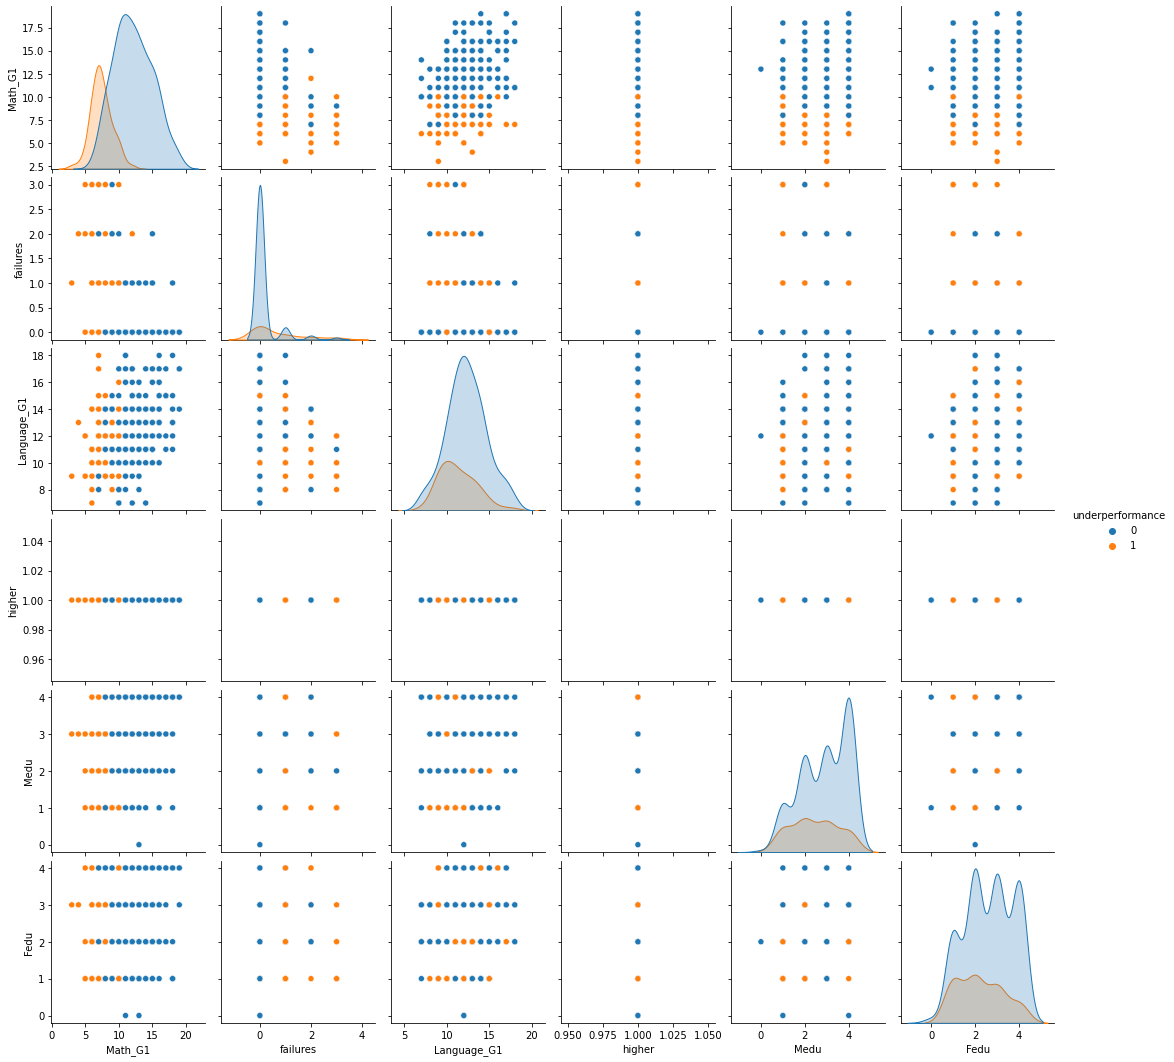

In [21]:
df_temp = df[['Math_G1','failures','Language_G1','higher','Medu','Fedu','underperformance']]
sns.pairplot(df_temp, hue='underperformance')

## Normalize numerical features if needed

### We'll use the maximum absolute scaling technique for normalization. This will allow us to modify all the columns, since  it is the simplest. Source: https://towardsdatascience.com/data-normalization-with-pandas-and-scikit-learn-7c1cc6ed6475

In [18]:
#create an abs_scaler object
abs_scaler = MaxAbsScaler()
# calculate the maximum absolute value for scaling the data using the fit method
abs_scaler.fit(df)
# the maximum absolute values calculated by the fit method
abs_scaler.max_abs_
# transform the data using the parameters calculated by the fit method (the maximum absolute values)
scaled_data = abs_scaler.transform(df)
# store the results in a data frame
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)
df = df_scaled

## Models

### Logistic Regression Model: G1Lang, no G1Math

#### Split into training and testing sets

In [39]:
XArray = df[df.columns.difference(['Math_G1','Language_G1', 'underperformance'])].values
YArray = df['underperformance'].values
X = XArray.reshape(-1, 36)
Y = YArray.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(XArray, Y, test_size=0.2, random_state=0)

#### Build Model

In [40]:
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

#### Check their model performance

In [41]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 0.22784810126582278
Mean Squared Error: 0.22784810126582278
Root Mean Squared Error: 0.47733437050543803
R-squared: -0.1339712918660283


### Perform cross-validations

<AxesSubplot:xlabel='trial'>

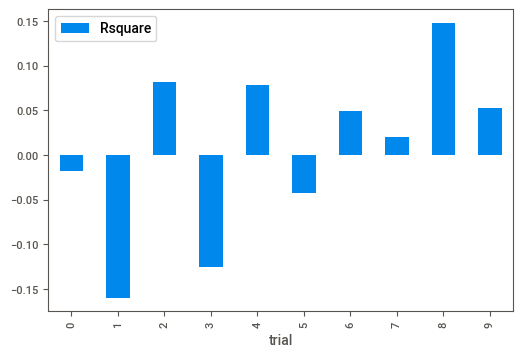

In [42]:
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf.plot.bar(x='trial', y='Rsquare')

### This is a terrible model. The r-squared is terrible, it doesn't pass cross validation. One of the worst models I have ever made.

### Logistic Regression Model: G1Lang, no G1Math

In [43]:
XArray = df[df.columns.difference(['Math_G1', 'underperformance'])].values
YArray = df['underperformance'].values
X = XArray.reshape(-1, 37)
Y = YArray.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(XArray, Y, test_size=0.2, random_state=0)

In [44]:
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

### Check their model performance

In [45]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 0.22784810126582278
Mean Squared Error: 0.22784810126582278
Root Mean Squared Error: 0.47733437050543803
R-squared: -0.1339712918660283


### Perform cross-validations

<AxesSubplot:xlabel='trial'>

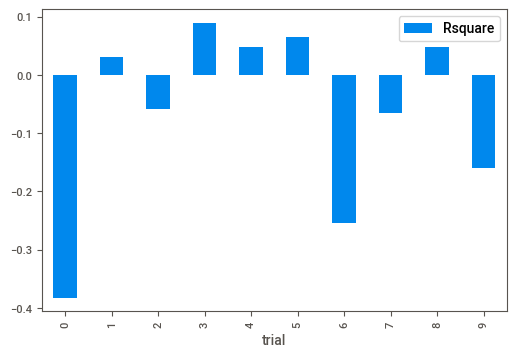

In [46]:
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf.plot.bar(x='trial', y='Rsquare')

### Another horrible model. Very low r squared and doesn't even remotely pass cross validation.

### Logistic Regression Model: G1Lang, G1Math

In [47]:
XArray = df[df.columns.difference(['underperformance'])].values
YArray = df['underperformance'].values
X = XArray.reshape(-1, 38)
Y = YArray.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(XArray, Y, test_size=0.2, random_state=0)

In [48]:
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

### Check their model performance

In [49]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 0.16455696202531644
Mean Squared Error: 0.16455696202531644
Root Mean Squared Error: 0.4056562116192928
R-squared: 0.18102073365231286


### Performed cross-validations

<AxesSubplot:xlabel='trial'>

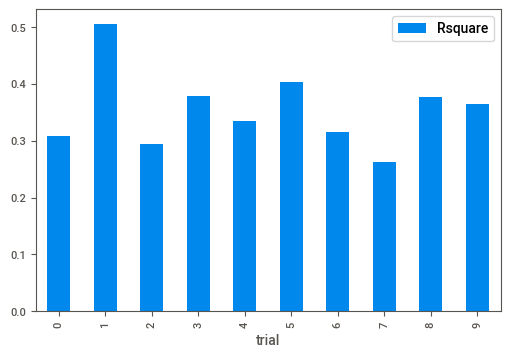

In [50]:
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf.plot.bar(x='trial', y='Rsquare')

### This model is only slightly better. The r-squared is still really low, and it is an iffy pass of cross validation.
### What is worth noting through the 3 logistic models is that even when we included the G1 Math score we still got a really bad model. What this indicates is that the data does not follow any sort of line through space. What we should probably use is a more sophisticated modeling technique.

# Decision tree

In [51]:
criterias=['gini','entropy']
for d in range(2,10):
    for c in criterias:
        model = DecisionTreeClassifier(max_depth=d, criterion=c)
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        print('---------------------------------')
        print('depth: '+str(d) + '\t' + 'criterion: ' + c +'\n')
        print(confusion_matrix(Y_test,predictions))
        print(classification_report(Y_test,predictions))
        print(accuracy_score(Y_test, predictions))

---------------------------------
depth: 2	criterion: gini

[[52  2]
 [ 9 16]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        54
           1       0.89      0.64      0.74        25

    accuracy                           0.86        79
   macro avg       0.87      0.80      0.82        79
weighted avg       0.86      0.86      0.85        79

0.8607594936708861
---------------------------------
depth: 2	criterion: entropy

[[52  2]
 [ 9 16]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        54
           1       0.89      0.64      0.74        25

    accuracy                           0.86        79
   macro avg       0.87      0.80      0.82        79
weighted avg       0.86      0.86      0.85        79

0.8607594936708861
---------------------------------
depth: 3	criterion: gini

[[49  5]
 [10 15]]
              precision    recall  f1-score   support

           0 